In [90]:
import numpy as np 
import pandas as pd
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy

In [91]:
import os,cv2
directory='D:/ML/FER2013/All'
dir_list=os.listdir(directory)
image_data_list=[]
labels=[]
emotions=[]
l=0
for data_dir in dir_list:
    data_list=os.listdir(directory+'/'+data_dir)
    for img in data_list:
        input_img=cv2.imread(directory+'/'+data_dir+'/'+img)
        input_img=cv2.resize(input_img,(48,48))
        image_data_list.append(input_img)
        labels.append(l)
    emotions.append(data_dir)
    l=l+1
img_data=np.array(image_data_list)
img_data=img_data/255
img_data.shape

(35891, 48, 48, 3)

In [92]:
i=1
for i in range(7):
    print('No of File with Emotion class'+ str(i) + ' : ' + str(labels.count(i)))

No of File with Emotion class0 : 4953
No of File with Emotion class1 : 547
No of File with Emotion class2 : 5121
No of File with Emotion class3 : 8989
No of File with Emotion class4 : 6198
No of File with Emotion class5 : 6081
No of File with Emotion class6 : 4002


In [93]:
num_classes=7
Y = keras.utils.to_categorical(labels, num_classes)
X_train, X_test, y_train, y_test = train_test_split(img_data, Y, test_size=0.2,shuffle= True, random_state=20)

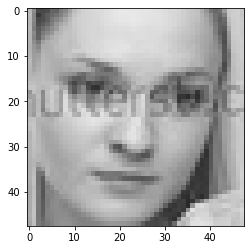

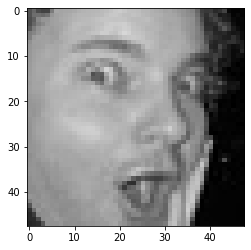

In [94]:
import matplotlib.pyplot as plt
for i in range(2):
    plt.imshow(X_train[i])
    plt.show()

In [95]:
X_train.shape, X_test.shape

((28712, 48, 48, 3), (7179, 48, 48, 3))

In [96]:
import tensorflow as tf
from tensorflow.keras.layers import  Flatten, Dense, Dropout
from tensorflow.keras import Model
import matplotlib.pyplot as plt
from keras.models import Model,Sequential
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential

In [117]:
import tensorflow as tf
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
model= tf.keras.models.Sequential()

#1st CNN model
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,3)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#2nd CNN model
model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#3rd CNN model    
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#4th CNN model
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#1st Fully Connected Layer layer
model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
#2nd Fully Connected Layer layer
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

#output Layer
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization_98 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_98 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_99 (Batc (None, 24, 24, 128)     

In [118]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer = Adam(learning_rate = 0.001,amsgrad=True,decay= 0.01), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [104]:
history=model.fit(X_train,y_train,epochs=150, batch_size= 100, validation_data=(X_test,y_test))

Epoch 1/150
288/288 [==============================] - 144s 500ms/step - loss: 1.8313 - accuracy: 0.2876 - val_loss: 1.8195 - val_accuracy: 0.2941
Epoch 2/150
288/288 [==============================] - 148s 514ms/step - loss: 1.6947 - accuracy: 0.3425 - val_loss: 1.7097 - val_accuracy: 0.3617
Epoch 3/150
288/288 [==============================] - 148s 514ms/step - loss: 1.6104 - accuracy: 0.3755 - val_loss: 1.6713 - val_accuracy: 0.3783
Epoch 4/150
288/288 [==============================] - 148s 514ms/step - loss: 1.5735 - accuracy: 0.3928 - val_loss: 1.5074 - val_accuracy: 0.4090
Epoch 5/150
288/288 [==============================] - 157s 546ms/step - loss: 1.5242 - accuracy: 0.4118 - val_loss: 1.4770 - val_accuracy: 0.4271
Epoch 6/150
288/288 [==============================] - 154s 533ms/step - loss: 1.4924 - accuracy: 0.4228 - val_loss: 1.7229 - val_accuracy: 0.3817
Epoch 7/150
288/288 [==============================] - 154s 534ms/step - loss: 1.4626 - accuracy: 0.4368 - val_loss: 1

In [105]:
import os
import cv2
import math
import numpy as np
import pandas as pd


from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc

import scikitplot
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, GlobalAvgPool2D, GlobalMaxPool2D
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.utils import plot_model

from keras.utils import np_utils

In [115]:
yhat_test = np.argmax(model.predict(X_train), axis=1)
ytest_ = np.argmax(y_train, axis=1)

training accuracy: 98.228 %


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3151
           1       0.99      1.00      0.99       348
           2       0.97      0.97      0.97      3294
           3       0.99      0.99      0.99      5773
           4       0.97      0.98      0.98      3956
           5       0.98      0.97      0.98      3876
           6       0.98      0.99      0.99      2571

    accuracy                           0.98     22969
   macro avg       0.98      0.98      0.98     22969
weighted avg       0.98      0.98      0.98     22969



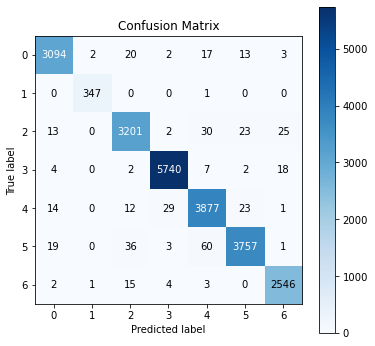

In [114]:
scikitplot.metrics.plot_confusion_matrix(ytest_, yhat_test, figsize=(6,6))
pyplot.savefig("confusion_matrix_mobilenet.png")

test_accu = np.sum(ytest_ == yhat_test) / len(ytest_) * 100
print(f"training accuracy: {round(test_accu, 4)} %\n\n")

print(classification_report(ytest_, yhat_test))

In [111]:
from sklearn import metrics
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(ytest_, yhat_test))
print()
print("Classification Report")
print(metrics.classification_report(ytest_, yhat_test, digits = 3))

Confusion Matrix for the Test Case
[[3862    2   32    2   21   16    3]
 [   0  429    0    0    1    0    1]
 [  19    1 3982    2   36   29   27]
 [   4    0    2 7142    7    2   22]
 [  16    0   13   43 4867   29    1]
 [  26    0   47    4   71 4714    1]
 [   2    1   16    4    4    0 3209]]

Classification Report
              precision    recall  f1-score   support

           0      0.983     0.981     0.982      3938
           1      0.991     0.995     0.993       431
           2      0.973     0.972     0.973      4096
           3      0.992     0.995     0.994      7179
           4      0.972     0.979     0.976      4969
           5      0.984     0.969     0.977      4863
           6      0.983     0.992     0.987      3236

    accuracy                          0.982     28712
   macro avg      0.983     0.983     0.983     28712
weighted avg      0.982     0.982     0.982     28712



In [55]:
def plot_confusion_matrix(ytest_, yhat_test, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(ytest_, yhat_test)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [69]:
emotion_labels = ['0:Angry’, ‘1:Disgust’, ‘2:Fear', '3:Happy', '4:Sad', '5:Surprise' '6:Neutral']

ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (4).

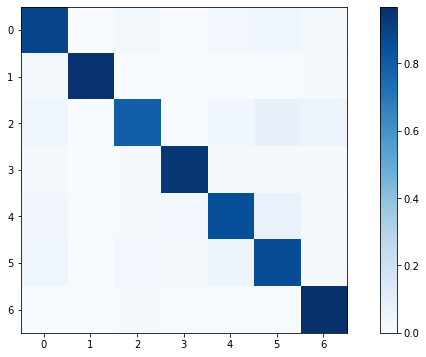

In [72]:
plot_confusion_matrix(ytest_,yhat_test, classes=emotion_labels, normalize=True, title='Normalized confusion matrix' )
plt.show()

In [116]:
Y_pred=model.predict(X_train)
Y_pred = np.argmax(Y_pred, axis=1)

Text(0.5, 1.0, 'Loss')

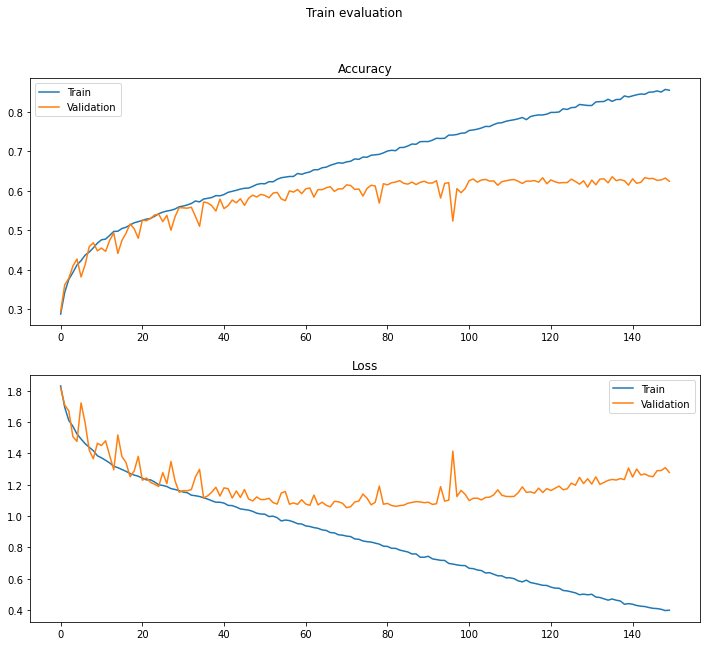

In [112]:
fig, ax=plt.subplots(2,1,figsize=(12,10))
fig.suptitle('Train evaluation')

sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['accuracy'])
sns.lineplot(ax= ax[0],x=np.arange(0,len(history.history['accuracy'])),y=history.history['val_accuracy'])

ax[0].legend(['Train','Validation'])
ax[0].set_title('Accuracy')

sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['loss'])
sns.lineplot(ax= ax[1],x=np.arange(0,len(history.history['loss'])),y=history.history['val_loss'])

ax[1].legend(['Train','Validation'])
ax[1].set_title('Loss')

In [20]:
print('-Acuracy achieved on test set : {:.2f}%\n-Accuracy by model was: {:.2f}%\n-Accuracy by validation was: {:.2f}%'.
      format(accuracy_score(np.where(y_t == 1)[1],Y_pred)*100,(history.history['accuracy'][-1])*100,(history.history['val_accuracy'][-1])*100))

-Acuracy achieved on test set : 95.48%
-Accuracy by model was: 92.86%
-Accuracy by validation was: 46.41%
